<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



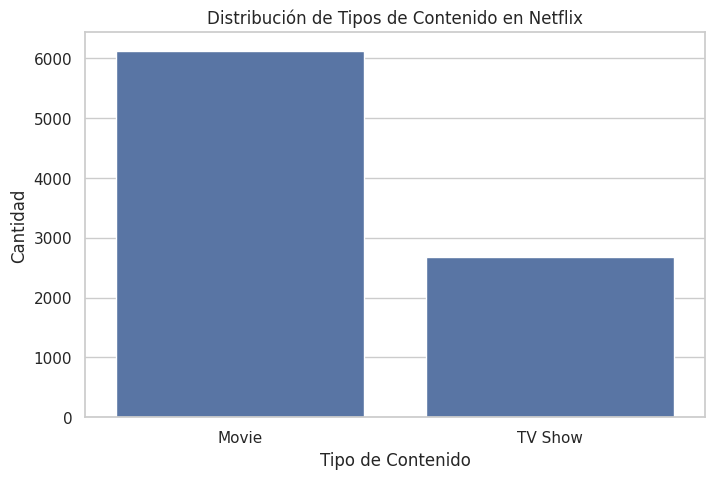

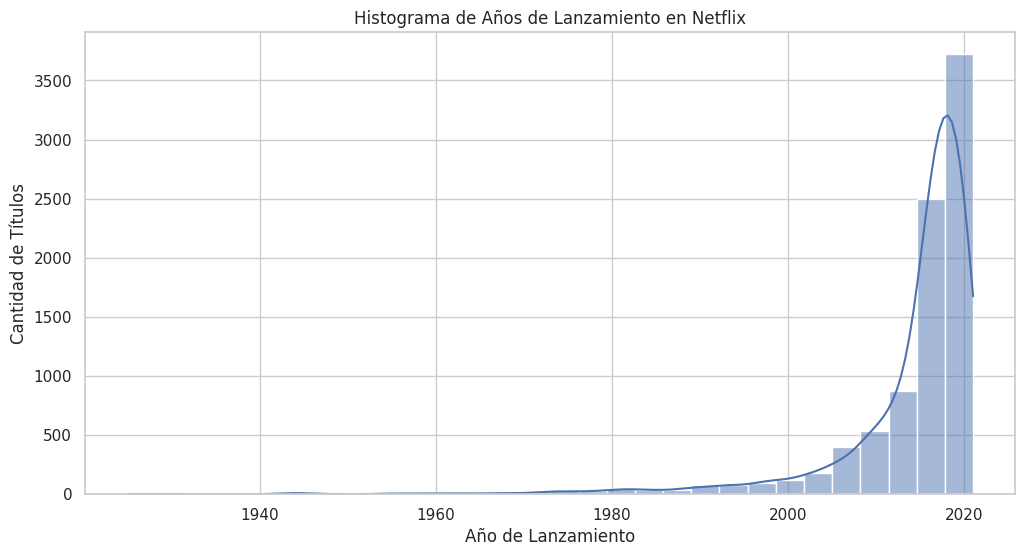

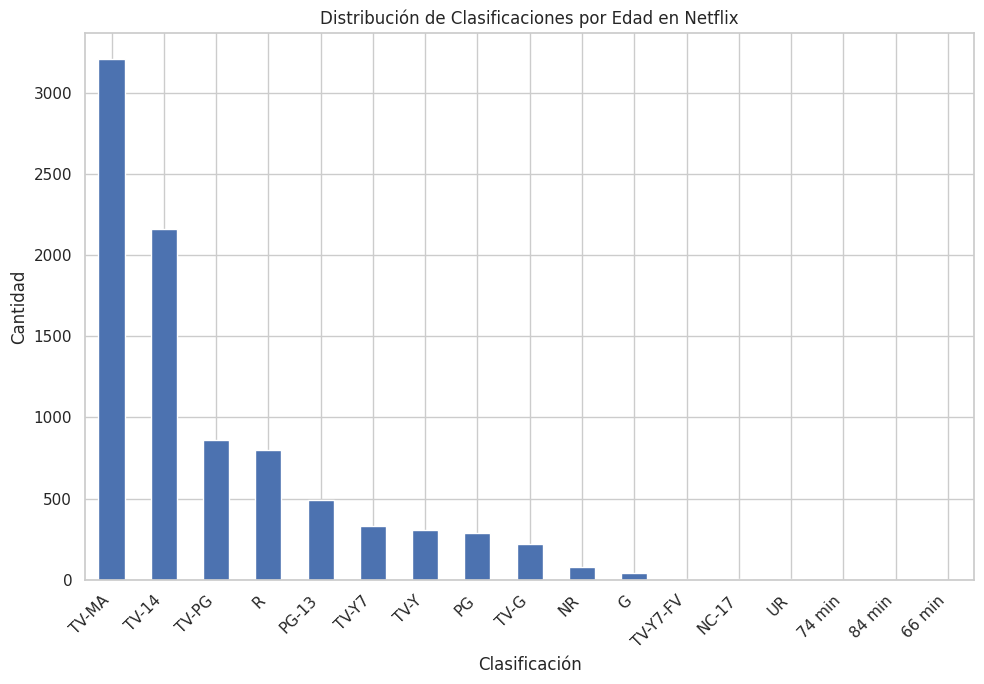

In [3]:
# 1. Distribución de tipos de contenido
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type')
plt.title('Distribución de Tipos de Contenido en Netflix')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()

# 2. Histograma de años de lanzamiento
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=True)
plt.title('Histograma de Años de Lanzamiento en Netflix')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Títulos')
plt.show()

# 3. Proporción de clasificaciones por edad (rating)
plt.figure(figsize=(10, 7))
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribución de Clasificaciones por Edad en Netflix')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Las películas predominan. Esto quizás da menos retención de usuarios.

La mayoría de títulos son recientes, de los '10. No noto un patrón en una década específica.

La clasificación de títulos es predominantemente solo para audiencias maduras (TV-MA). Público adulto.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


In [ ]:
# 4. Número de títulos agregados por año
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_added')
plt.title('Número de Títulos Agregados por Año')
plt.xlabel('Año Agregado')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45, ha='right')
plt.show()

Creció predominantemente en 2019. Podría ser que en este año es cuando hubo más inversión.

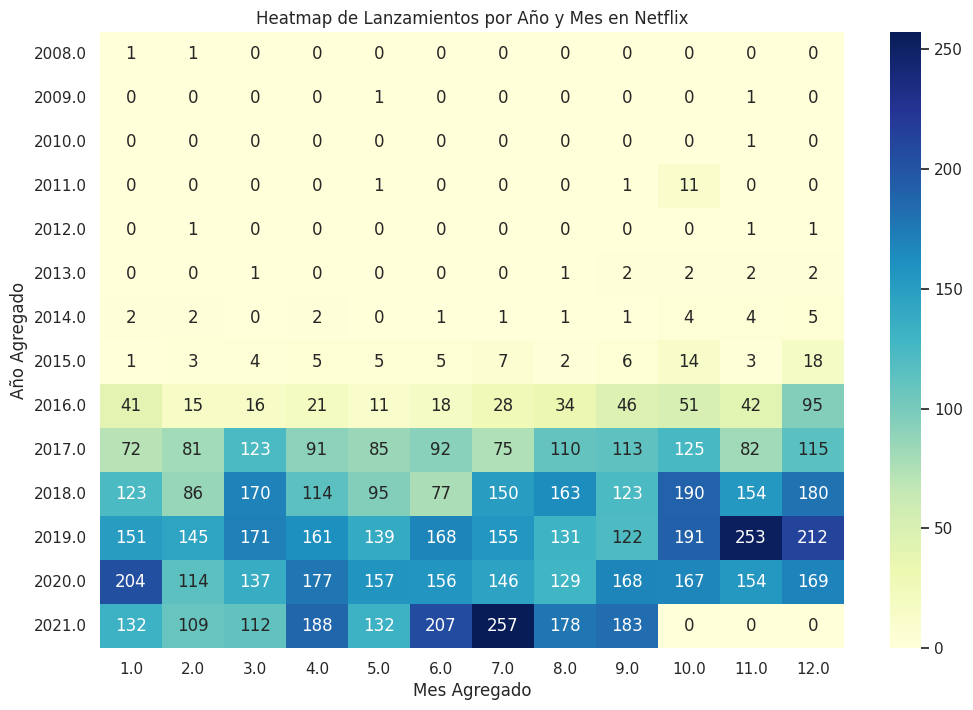

In [6]:
# 5. Heatmap de lanzamientos por año y mes
monthly_counts = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap de Lanzamientos por Año y Mes en Netflix')
plt.xlabel('Mes Agregado')
plt.ylabel('Año Agregado')
plt.show()

Parece añadirse más contenido en la segunda mitad del año. Calzando con las épocas más frías en el hemisferio norte, donde la gente se quedaría más en casa para Netflix and chill.

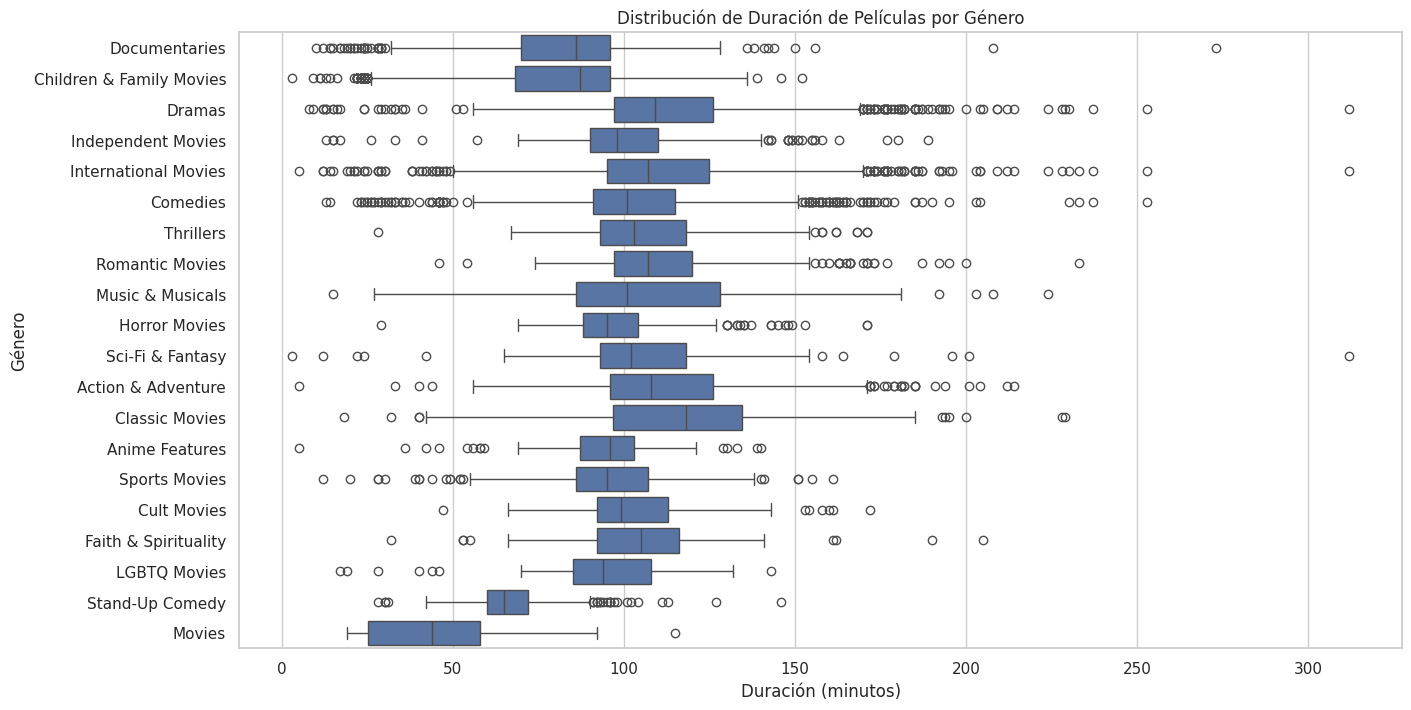

In [20]:
# 6. Duración de películas por género
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)

# Since a movie can have multiple genres, we need to split the 'listed_in' column
# and then explode it to have one row per genre for each movie.
movies_df['listed_in'] = movies_df['listed_in'].str.split(', ')
movies_df_genres = movies_df.explode('listed_in')

# Filter out genres with less than 20 movies
genre_counts = movies_df_genres['listed_in'].value_counts()
genres_to_keep = genre_counts[genre_counts >= 20].index
movies_df_genres_filtered = movies_df_genres[movies_df_genres['listed_in'].isin(genres_to_keep)]

plt.figure(figsize=(15, 8))
movies_df_genres_filtered = movies_df_genres_filtered.reset_index(drop=True)

sns.boxplot(data=movies_df_genres_filtered, x='duration_minutes', y='listed_in')
plt.title('Distribución de Duración de Películas por Género')
plt.xlabel('Duración (minutos)')
plt.ylabel('Género')
plt.show()

Las películas clásicas tienen mayor mediana y promedio de duración, tambienen el último decil más alto de todos los géneros. Los musicales parecen tener la mayor variabilidad en duración y los stand-up comedy la menor variabilidad.





## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



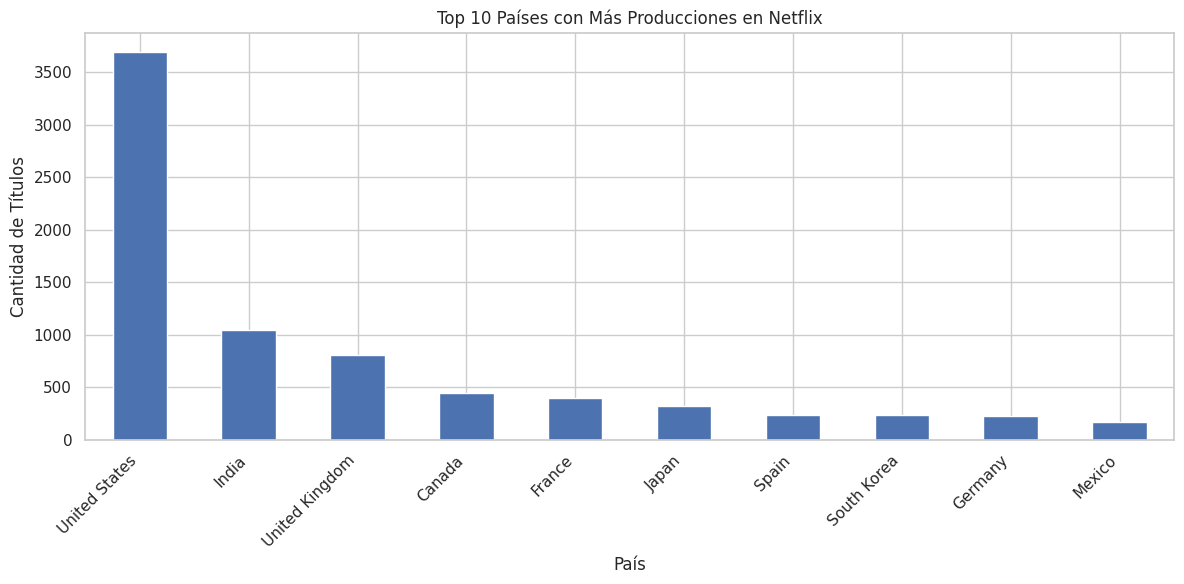

In [21]:
# 7. Top 10 países con más producciones
# Since a title can be associated with multiple countries, we need to split the 'country' column
# and then explode it to have one row per country for each title.
country_df = df.copy()
country_df['country'] = country_df['country'].str.split(', ')
country_df_exploded = country_df.explode('country')

plt.figure(figsize=(12, 6))
country_df_exploded['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Países con Más Producciones en Netflix')
plt.xlabel('País')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Predomina USA. No es de extrañar, ya que Netflix es una compañia estadounidense, así que tiene más facilidad de hacer tratos comerciales con productoras estadounidenses.

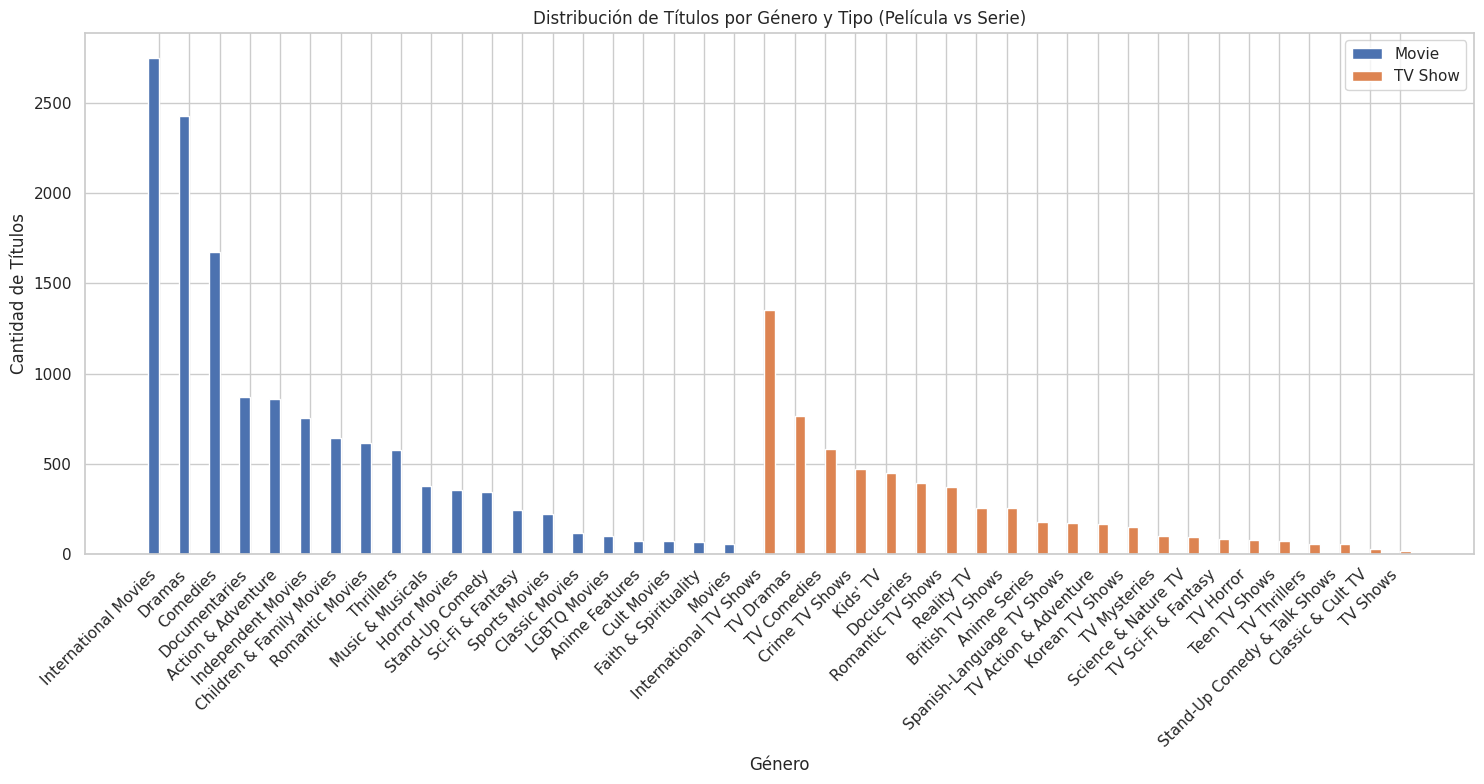

Genres with both Movie and TV Show:
Empty DataFrame
Columns: [Movie, TV Show]
Index: []


In [37]:
# 8. Películas vs Series según género
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Explode genres
genre_df = df.copy()
genre_df['listed_in'] = genre_df['listed_in'].str.split(', ')
genre_df_exploded = genre_df.explode('listed_in')

# Count number of titles per genre and type
counts = genre_df_exploded.groupby(['listed_in', 'type']).size().unstack(fill_value=0)

# Ensure both columns exist
for col in ['Movie', 'TV Show']:
    if col not in counts.columns:
        counts[col] = 0

# Sort genres by total counts if desired
counts = counts.sort_values(by=['Movie', 'TV Show'], ascending=False)

# Set positions for grouped bars
x = np.arange(len(counts))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x - width/2, counts['Movie'], width, label='Movie')
ax.bar(x + width/2, counts['TV Show'], width, label='TV Show')

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(counts.index, rotation=45, ha='right')
ax.set_ylabel('Cantidad de Títulos')
ax.set_xlabel('Género')
ax.set_title('Distribución de Títulos por Género y Tipo (Película vs Serie)')
ax.legend()
plt.tight_layout()
plt.show()


# Pivot table: counts per genre and type
counts = genre_df_exploded.groupby(['listed_in', 'type']).size().unstack(fill_value=0)

both_present = (counts > 0).all(axis=1)
print("Géneros que tienen a películas y TV shows simultáneamente:")
print(counts[both_present])

Notamos que cada género tiene o solo películas o solo TV shows.

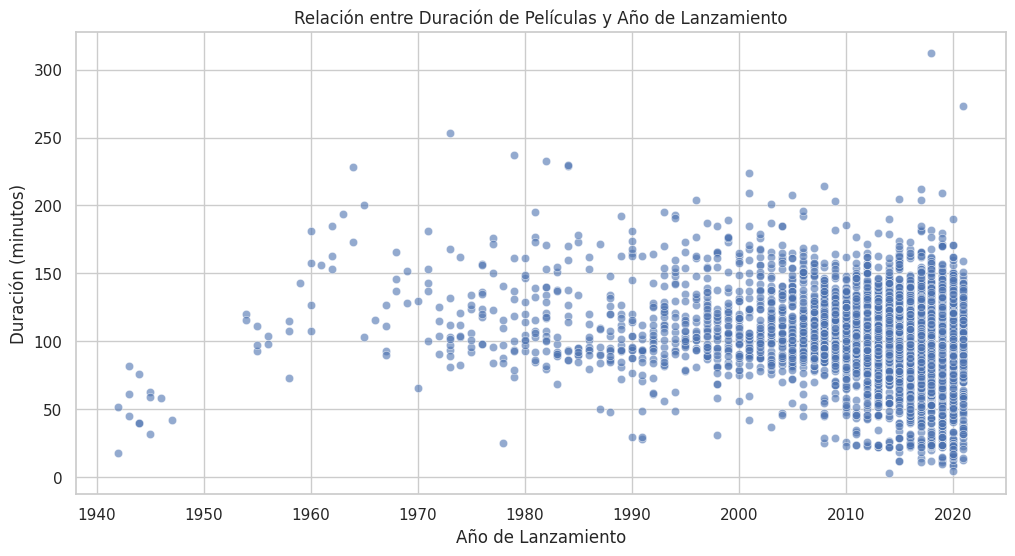

In [38]:
# 9. Relación entre duración y año de lanzamiento
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_df, x='release_year', y='duration_minutes', alpha=0.6)
plt.title('Relación entre Duración de Películas y Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (minutos)')
plt.show()

En los '40 las peliculas duraban alrededor de la hora. La duración ha pasado a estar alrededor de los 90 minutos. En los últimos se ven algunos outliers de altísima duración (que seguramente se corresponde al formato de película interactiva de Netflix, como en Black Mirror Bandersnatch).


## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

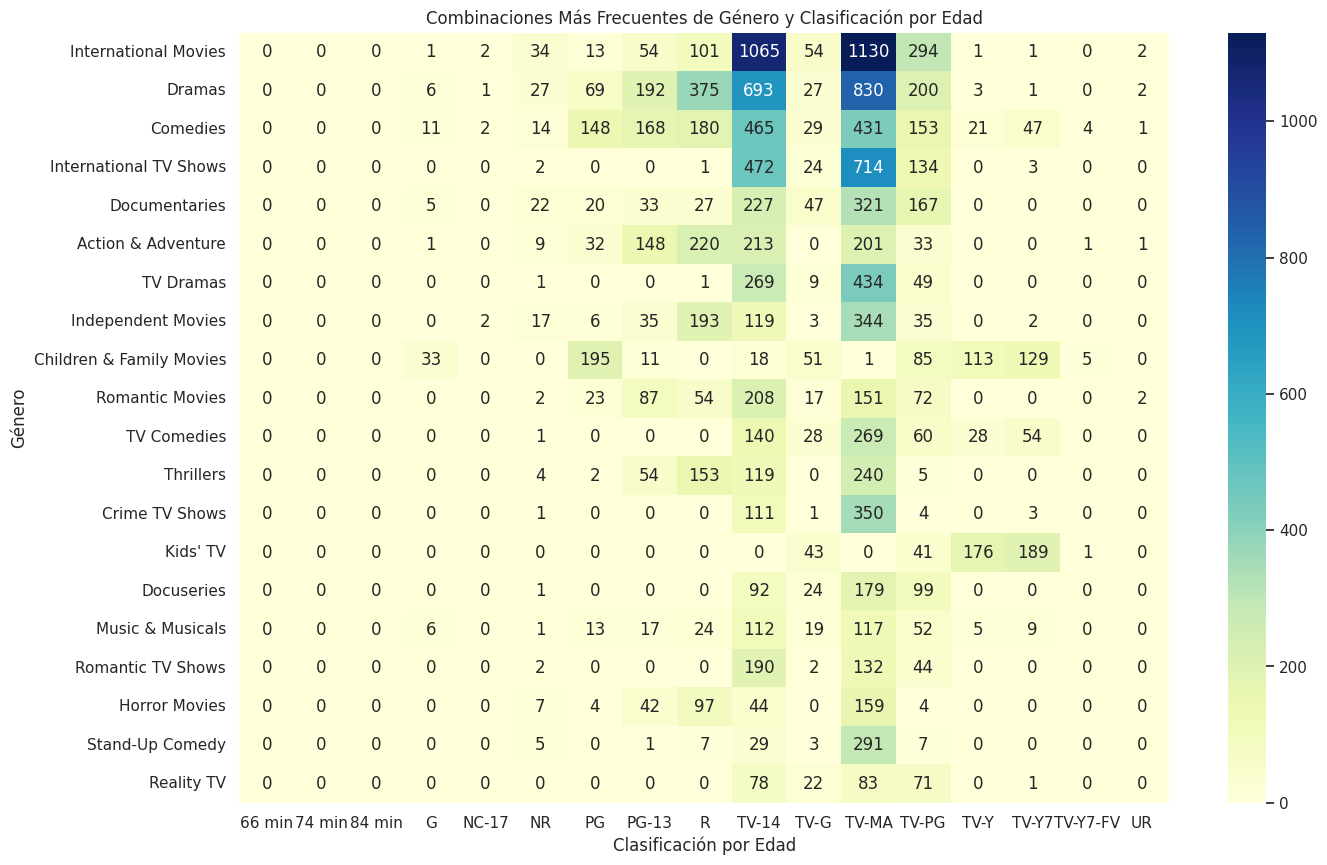

In [41]:
# Desafío Final: Combinaciones más frecuentes de género + rating

genre_rating_df = df.copy()
genre_rating_df['listed_in'] = genre_rating_df['listed_in'].str.split(', ')
genre_rating_df_exploded = genre_rating_df.explode('listed_in')

genre_rating_counts = genre_rating_df_exploded.groupby(['listed_in', 'rating']).size().unstack(fill_value=0)

top_genres = genre_rating_counts.sum(axis=1).sort_values(ascending=False).head(20).index
genre_rating_counts_top = genre_rating_counts.loc[top_genres]

plt.figure(figsize=(15, 10))
sns.heatmap(genre_rating_counts_top, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Combinaciones Más Frecuentes de Género y Clasificación por Edad')
plt.xlabel('Clasificación por Edad')
plt.ylabel('Género')
plt.show()

Parece que las más dirigidas a adultos son las internacionales y las más a niños son las Children and Family Movies y Kid's TV (como es de esperar)